## Hello world of neural network

In [1]:
# Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import datasets
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
# Split data into train and test data(min 7:3 ratio)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images = train_images/255.0
test_images = test_images/255.0

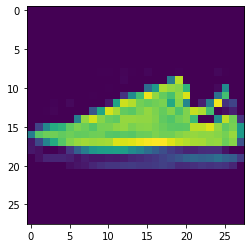

In [6]:
plt.imshow(train_images[6])
plt.show()

In [7]:
train_labels[6]

7

In [8]:
class_names[7]

'Sneaker'

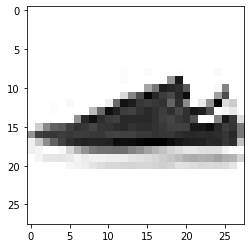

In [9]:
plt.imshow(train_images[6],cmap=plt.cm.binary)
plt.show()

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
test_images.shape

(10000, 28, 28)

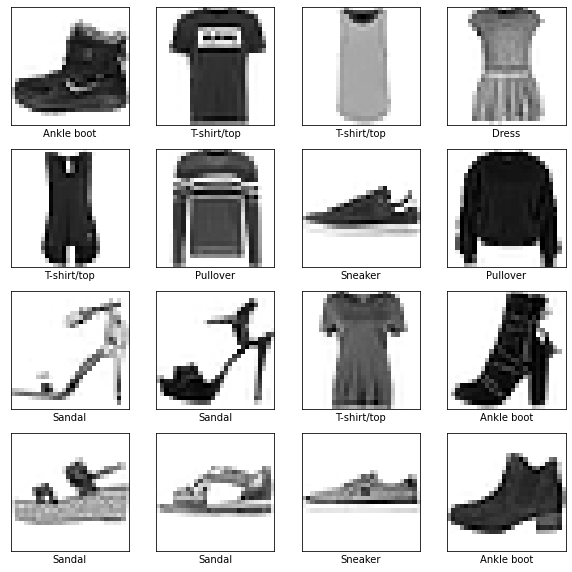

In [12]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

In [13]:
# Set up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

## Train the model
   1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
   2. The model learns to associate images and labels.
   3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
   4. Verify that the predictions match the labels from the `test_labels` array.

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Feed the model
To start training, call the `model.fit` method—so called because it "fits" the model to the training data:

In [15]:
# Feed the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/sample - loss: 1.7175 - accuracy: 0.7520
Epoch 2/10
60000/60000 [==============================] - 3s 45us/sample - loss: 1.6743 - accuracy: 0.7891s -
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 1.6215 - accuracy: 0.8411s - loss: - ETA: 2s -
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 1.6014 - accuracy: 0.8611
Epoch 5/10
60000/60000 [==============================] - 3s 45us/sample - loss: 1.5942 - accuracy: 0.8684s - loss: 1.594 - ETA:  - ETA: 0s - loss: 1.5944 - accuracy
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 1.5899 - accuracy: 0.8728
Epoch 7/10
60000/60000 [==============================] - 3s 45us/sample - loss: 1.5845 - accuracy: 0.8774
Epoch 8/10
60000/60000 [==============================] - 3s 45us/sample - loss: 1.5816 - accuracy: 0.8803
Epoch 9/10
60000/60000 [==============

### Evaluate accuracy

 * Next, compare how the model performs on the test dataset

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 1.5982 - accuracy: 0.8631

Test accuracy: 0.8631


## Make predictions

In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

In [19]:
predictions[0]

array([0.08539738, 0.08539738, 0.08539738, 0.08539738, 0.08539738,
       0.08553764, 0.08539738, 0.08567307, 0.08539738, 0.23100768],
      dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

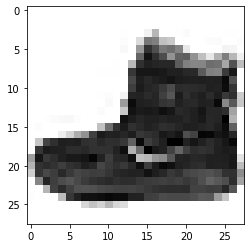

In [23]:
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.show()